In [16]:
# %matplotlib widget

from __future__ import annotations

import re
from collections import defaultdict
from dataclasses import dataclass, field
from itertools import product
from math import inf
from random import choice

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from numpy import int_, object_
from numpy.typing import NDArray
from util import print_hex

COLORS = list(mcolors.CSS4_COLORS.keys())

<link href="style.css" rel="stylesheet"></link>
<article class="day-desc read-aloud"><h2>--- Day 25: Snowverload ---</h2><p><em>Still</em> somehow without snow, you go to the last place you haven't checked: the center of Snow Island, directly below the waterfall.</p>
<p>Here, someone has clearly been trying to fix the problem. Scattered everywhere are hundreds of weather machines, almanacs, communication modules, hoof prints, machine parts, mirrors, lenses, and so on.</p>
<p>Somehow, everything has been <em>wired together</em> into a massive snow-producing apparatus, but nothing seems to be running. You check a tiny screen on one of the communication modules: <code>Error 2023</code>. It doesn't say what <code>Error 2023</code> means, but it <em>does</em> have the phone number for a support line printed on it.</p>
<p>"Hi, you've reached Weather Machines And So On, Inc. How can I help you?" You explain the situation.</p>
<p>"Error 2023, you say? Why, that's a power overload error, of course! It means you have too many components plugged in. Try unplugging some components and--" You explain that there are hundreds of components here and you're in a bit of a hurry.</p>
<p>"Well, let's see how bad it is; do you see a <em>big red reset button</em> somewhere? It should be on its own module. If you push it, it probably won't fix anything, but it'll report how overloaded things are." After a minute or two, you find the reset button; it's so big that it takes two hands just to get enough leverage to push it. Its screen then displays:</p>
<pre><code>SYSTEM OVERLOAD!

Connected components would require
power equal to at least <em class="star">100 stars</em>!
</code></pre>

<p>"Wait, <em>how</em> many components did you say are plugged in? With that much equipment, you could produce snow for an <em>entire</em>--" You disconnect the call.</p>
<p>You have nowhere near that many stars - you need to find a way to disconnect at least half of the equipment here, but it's already Christmas! You only have time to disconnect <em>three wires</em>.</p>
<p>Fortunately, someone left a wiring diagram (your puzzle input) that shows <em>how the components are connected</em>. For example:</p>
<pre><code>jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr
</code></pre>
<p>Each line shows the <em>name of a component</em>, a colon, and then <em>a list of other components</em> to which that component is connected. Connections aren't directional; <code>abc: xyz</code> and <code>xyz: abc</code> both represent the same configuration. Each connection between two components is represented only once, so some components might only ever appear on the left or right side of a colon.</p>
<p>In this example, if you disconnect the wire between <code>hfx</code>/<code>pzl</code>, the wire between <code>bvb</code>/<code>cmg</code>, and the wire between <code>nvd</code>/<code>jqt</code>, you will <em>divide the components into two separate, disconnected groups</em>:</p>
<ul>
<li><code><em>9</em></code> components: <code>cmg</code>, <code>frs</code>, <code>lhk</code>, <code>lsr</code>, <code>nvd</code>, <code>pzl</code>, <code>qnr</code>, <code>rsh</code>, and <code>rzs</code>.</li>
<li><code><em>6</em></code> components: <code>bvb</code>, <code>hfx</code>, <code>jqt</code>, <code>ntq</code>, <code>rhn</code>, and <code>xhk</code>.</li>
</ul>
<p>Multiplying the sizes of these groups together produces <code><em>54</em></code>.</p>
<p>Find the three wires you need to disconnect in order to divide the components into two separate groups. <em>What do you get if you multiply the sizes of these two groups together?</em></p>
</article>


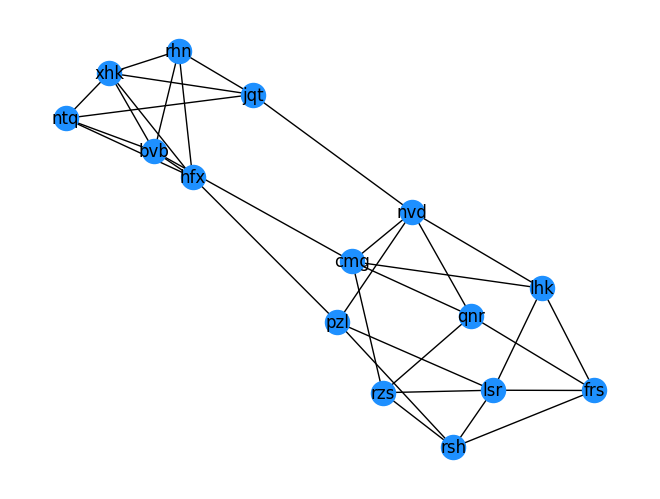

In [27]:
from math import prod


wiring_diagram = """
jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr
"""


class Graph:
    def __init__(self, wiring_diagram: str) -> None:
        graph = defaultdict(list)

        for wire in wiring_diagram.strip().splitlines():
            fr, tos = re.split(r": ", wire)
            tos = tos.split(" ")
            for to in tos:
                graph[fr].append(to)
                graph[to].append(fr)
        self.graph = graph

    def plot(self):
        plt.close()

        G = self.create_G()
        # edge_labels = {
        #     (fr, to): w for fr, tos in self.graph.items() for to, w in tos.items()
        # }
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color="DodgerBlue")
        plt.show()

    def create_G(self):
        G = nx.Graph()  # create an empty object

        G.add_nodes_from(self.graph.keys())
        G.add_edges_from((fr, to) for fr, tos in self.graph.items() for to in tos)

        return G

    def stoer_wagner(self) -> int:
        G = self.create_G()
        return nx.stoer_wagner(G)

    def multiply_two_sides_of_minimal_cut(self):
        _, sites = self.stoer_wagner()
        return prod(len(s) for s in sites)

    def __repr__(self) -> str:
        return "\n".join(f"{k}:{i}" for k, i in self.graph.items())


g = Graph(wiring_diagram)
g.plot()
assert g.multiply_two_sides_of_minimal_cut() == 54

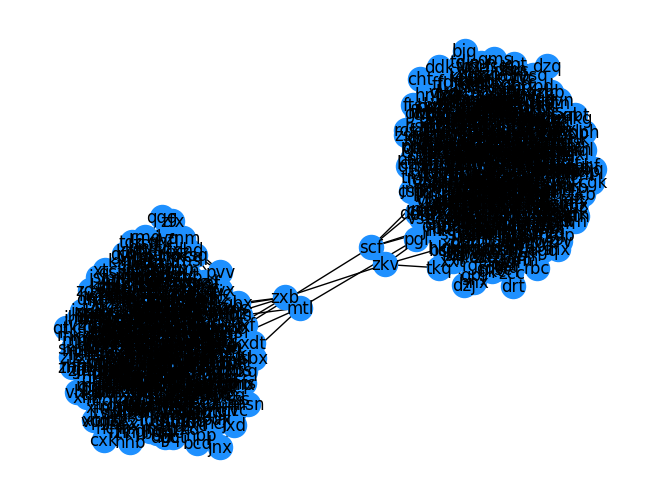

562772


In [29]:
with open("../input/day25.txt") as f:
    gf = Graph(f.read())
    gf.plot()
    print(gf.multiply_two_sides_of_minimal_cut())

<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>562772</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>You climb over weather machines, under giant springs, and narrowly avoid a pile of pipes as you find and disconnect the three wires.</p>
<p>A moment after you disconnect the last wire, the big red reset button module makes a small ding noise:</p>
<pre><code>System overload resolved!
Power required is now <em class="star">50 stars</em>.
</code></pre>
<p>Out of the corner of your eye, you notice goggles and a loose-fitting hard hat peeking at you from behind an ultra crucible. You think you see a <span title="i help">faint glow</span>, but before you can investigate, you hear another small ding:</p>
<pre><code>Power required is now <em class="star">49 stars</em>.

Please supply the necessary stars and
push the button to restart the system.
</code></pre>

</article>

</main>
